In [11]:
import sys
sys.path.append('..')

In [12]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DATA

In [13]:
from pennylane import numpy as np
file_path = '../data/energies/Trial/Strings_Energies.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/1000
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

In [14]:
X, Y = angles_list, score_list

# Model

## Define

In [15]:
circuit_layers = \
    [layers.angle_preparation()] + \
    [layers.rotationX_layer(), layers.rotationZ_layer(), layers.rotationZZ_layer()] * 50 +  \
    [layers.mesurament(qubits=[0])]

In [16]:
import pennylane as qml
SCORE_PREDICTOR = m.model(
    n_qubits_data = 12, 
    circuit_layers = circuit_layers
)

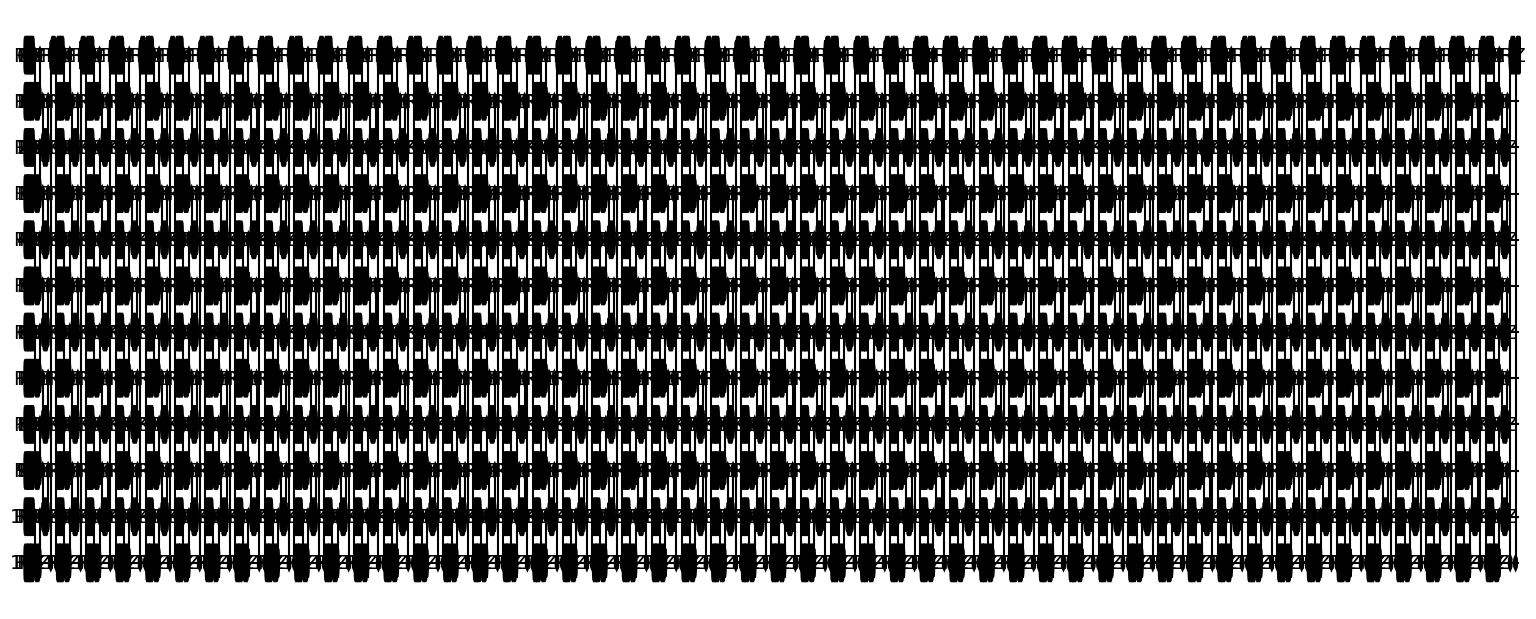

In [17]:
SCORE_PREDICTOR.draw_circuit(size=(15, 6))

## Train

In [18]:
SCORE_PREDICTOR.set_data(    
    data_X = X, 
    data_Y = Y, 
    # data_validation = data_validation
)

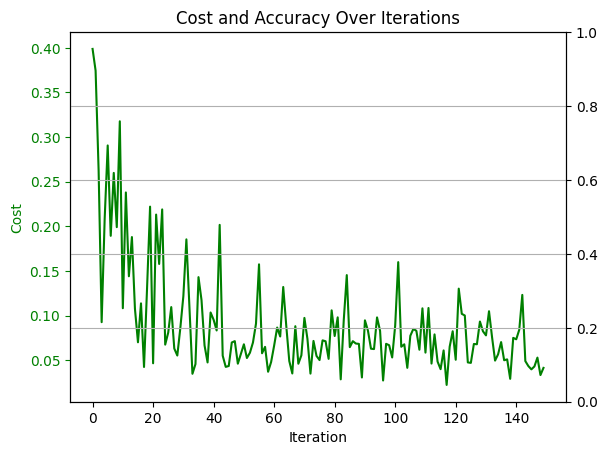

Epoch: 1 | Iter:    50 | Cost: 0.0414446 | Accuracy: 0.9585554 
Epoch: 1 | Iter:    51 | Cost: 0.0534124 | Accuracy: 0.9465876 
Epoch: 1 | Iter:    52 | Cost: 0.0391504 | Accuracy: 0.9608496 


KeyboardInterrupt: 

In [19]:
SCORE_PREDICTOR.train(
    epochs = 100,     
    batch_size = 10,
    optimizer = qml.SPSAOptimizer(maxiter=1000, c=0.15, a=0.2),
    randomize_batches = False,
    initialize_params = True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 5
    }
)

## Try

In [20]:
# take 20 items from the data set randomly

import random
random.seed(42)
random_index = random.sample(range(0, len(X)), 20)
X_test = X[random_index]
Y_test = Y[random_index]

# predict the score for the 20 items
Y_predicted = [SCORE_PREDICTOR.predict(x) for x in X_test]

In [21]:
# print the results
for i in range(len(X_test)):
    print("String: {} \tScore: {:.3f} \tPredicted: {:.3f} \tDiference: {:.3f}".format(i, Y_test[i].item(), Y_predicted[i].item(), abs(Y_test[i].item() - Y_predicted[i].item())))

String: 0 	Score: 0.300 	Predicted: 0.370 	Diference: 0.070
String: 1 	Score: 0.667 	Predicted: 0.353 	Diference: 0.314
String: 2 	Score: 0.244 	Predicted: 0.445 	Diference: 0.201
String: 3 	Score: 0.514 	Predicted: 0.430 	Diference: 0.083
String: 4 	Score: 0.006 	Predicted: 0.379 	Diference: 0.373
String: 5 	Score: 0.772 	Predicted: 0.407 	Diference: 0.365
String: 6 	Score: 0.316 	Predicted: 0.386 	Diference: 0.069
String: 7 	Score: 0.581 	Predicted: 0.404 	Diference: 0.177
String: 8 	Score: 0.475 	Predicted: 0.400 	Diference: 0.075
String: 9 	Score: 0.404 	Predicted: 0.354 	Diference: 0.050
String: 10 	Score: 0.587 	Predicted: 0.335 	Diference: 0.253
String: 11 	Score: 0.331 	Predicted: 0.398 	Diference: 0.068
String: 12 	Score: 0.677 	Predicted: 0.390 	Diference: 0.287
String: 13 	Score: 0.153 	Predicted: 0.402 	Diference: 0.249
String: 14 	Score: 0.270 	Predicted: 0.388 	Diference: 0.118
String: 15 	Score: 0.119 	Predicted: 0.416 	Diference: 0.297
String: 16 	Score: 0.449 	Predicte